In [1]:
import pandas as pd
import numpy as np
import kss
from tqdm import tqdm_notebook

df = pd.read_csv('아이패드 프로 12.9 5세대_크롤링.csv', encoding='cp949')
df = df[['Unnamed: 5', 'label']]
df.columns = ['desc', 'label']
df.dropna(how='any', axis=0, inplace=True)
df['label'] = df['label'].apply(int)
df

,desc,label
0,아이패드프로 세대 스페이스그레이 풀박스거의사용 안함 액정 본체 전부 깨끗합니다,1
1,아이패드프로 세대 스페이스그레이 팝니다 애플케어플러스 주말에 시간씩 영상시청용도로 ...,1
2,아이패드 프로 세대 이며거의 사용을 안해서 상태가 매우 좋습니다구성품으로 아이패드...,1
4,아이패드 프로 세대 구매일자 애플케어 기스나 흠집 없고 상태 매우 좋습니다네고문의 ...,1
5,아이패드프로 세대칩 장착모델입니다 와이파이전용 인치 기가 와이파이전용 인치 기가 와...,0
...,...,...
574,미개봉 아이패드 프로 세대 형 실버 애케플 까지와이프주려고샀는데안한데서 팝니다 경남...,0
575,월 일 도착하는 사전예약 제품입니다 선물용으로 구매했는데 못주게 되어서 그냥 취소할...,0
577,아이패드 프로 세대 인치 스페이스그레이쿠팡 차 사전예약분 월 일 도착예정배송비 변경...,0
578,공홈에서 구입했어며 월 일 도착예정입니다 비싼 기기인만큼 미개봉 그대로 직거래로만 ...,0


In [2]:
df.isnull().sum()

desc     0
label    0
dtype: int64

In [3]:
df.nunique()

desc     467
label      3
dtype: int64

# hanspell 적용

In [4]:
from hanspell import spell_checker

def hanspell(sentence):
    spelled_sent = spell_checker.check(sentence)
    return spelled_sent.checked

In [5]:
df['desc'] = df['desc'].apply(hanspell)

In [6]:
df['desc']

0       아이패드 프로 세대 스페이스 그레이 풀박승 거의 사용 안 함 액정 본체 전부 깨끗합니다
1      아이패드 프로 세대 스페이스 그레이 팝니다 애플케어플러스 주말에 시간씩 영상 시청 ...
2       아이패드 프로 세대이며 거의 사용을 안 해서 상태가 매우 좋습니다고 성품으로 아이...
4      아이패드 프로 세대 구매일자 애플케어 흠집이나 흠집 없고 상태 매우 좋습니다 내 고...
5      아이패드 프로 세대 칩 장착 모델입니다 와이파이 전용 인치 기가 와이파이 전용 인치...
                             ...                        
574    미개봉 아이패드 프로 세대 형 실버 애 커플까지 와이프 주려고 샀는데 안 한 데서 ...
575    월 일 도착하는 사전예약 제품입니다 선물용으로 구매했는데 못 주게 되어서 그냥 취소...
577    아이패드 프로 세대 인치 스페이스 그레이 쿠팡 차 사전예약분 월 일 도착 예정 배송...
578    공홈에서 구입했어며 월 일 도착 예정입니다 비싼 기기인 만큼 미개봉 그대로 직거래로...
584    오늘 쿠팡에서 사전예약한 아이패드입니다 대 성공하긴 했는데 카드 문제로 오후에 취소...
Name: desc, Length: 467, dtype: object

# 문장 토큰화
- kss
- kiwi

In [7]:
import kss

# 문장 토큰화 함수
def sentence_tokenizer(text):
    sentence_list = []
    for sentence in kss.split_sentences(text):
        sentence_list.append(sentence)
    return sentence_list

In [42]:
from kiwipiepy import Kiwi

def sentence_tokenizer_kiwi(text):
    sentence_list = []
    kiwi = Kiwi()
    for outs in kiwi.split_into_sents(text):
        for out in outs:
            sentence_list.append(out.text)
    return sentence_list

In [43]:
df['desc'] = df['desc'].apply(sentence_tokenizer_kiwi)

In [44]:
for i in df['desc']:
    print(i)

['아이패드 프로 세대 스페이스 그레이 풀박승 거의 사용 안 함', '액정 본체 전부 깨끗합니다']
['아이패드 프로 세대 스페이스 그레이 팝니다', '애플케어플러스 주말에 시간씩 영상 시청 용도로 사용했습니다', '전면 강화유리 후면 보호필름 부착되어있습니다', '흠집 찍힘', '없이 새것 같습니다', '애플케어플러스 연월일까지 안전거래 네고 지방이라 직거래 물어보면 차단 다이소 뽂뽂이 풀로 감아서 박스에 담아 보내드립니다', '태포 안심번호로 문자 주세요']
['아이패드 프로 세대이며 거의 사용을 안 해서 상태가 매우 좋습니다', '고 성품으로 아이패드 애플 펜슬 매직 키보드 신지모루 케이스 개 종이 질감 필름 개 금속 펜촉 이렇게 드립니다', '모든 구성품 박스 있습니다', '고 성품도 알차고 싸게 파니까 연락 많이 주세요']
['아이패드 프로 세대 칩 장착 모델입니다', '와이파이 전용 인치 기가 와이파이 전용 인치 기가 와이파이 전용 인치 기가 와이파이 전용 인치 테라 와이파이 전용 인치 테라 와이파이 전용 애플코리아 정품입니다', '미개봉 새 상품입니다', '애플케어플러스 가입 가능합니다', '세금계산서 발행 가능합니다', '부가세 프로 별도입니다', '기가 와이파이 전용 미개봉 그레이 만원 특가 상품입니다', '미개봉 실버 만원 특가 상품입니다', '애플케어플러스 가입 가능합니다', '기가 와이파이 전용 미개봉 새 상품입니다', '미개봉 그레이 만원 특가 상품입니다', '미개봉 실버']
['아이패드 프로 세대 인치 기가 스페이스 그레이 애플 펜슬 세대 판매합니다', '중고로 차 구매하였는데 생각보다 너무 무거워서 판매합니다', '아이패드 최초 실행일 배터리 진단 결과 배터리 성능 흠집 찍힘', '휨 일절 없는 상태 급 기기입니다', '구성품 아이패드 프로 세대 인치 기가 풀백 스스 코코 아트지 종이 질감 필름 부착 중애플펜슬 세대 풀박스아이패드 프로 인치 전용 투명 케이스 애플 펜슬 수납 가능']
['아이패드 프로 세대 인치 셀룰러 실버 판매합니다

# 상태 텍스트 검출

In [45]:
status_w_l = ['기스', '배터리', '깨끗', '새', '미개봉', '새제품', '새상품', '모서리', '거의', '액정', '사용']  # 상태 검출 단어 리스트

# 상태 문장 검출 함수
def detection_status(sentence_l):
    l = []
    for sentence in sentence_l:
        for word in status_w_l:
            if sentence.find(word) >= 0:
                l.append(sentence)
                break
    return ' '.join(l)

In [46]:
df['status_sentence'] = df['desc'].apply(detection_status)

In [47]:
df['status_sentence']

0       아이패드 프로 세대 스페이스 그레이 풀박승 거의 사용 안 함 액정 본체 전부 깨끗합니다
1            애플케어플러스 주말에 시간씩 영상 시청 용도로 사용했습니다 없이 새것 같습니다
2                   아이패드 프로 세대이며 거의 사용을 안 해서 상태가 매우 좋습니다
5      미개봉 새 상품입니다 기가 와이파이 전용 미개봉 그레이 만원 특가 상품입니다 미개봉...
7                     아이패드 최초 실행일 배터리 진단 결과 배터리 성능 흠집 찍힘
                             ...                        
572                           사진 보시면 정말 미개봉인 거 확인 가능하십니다
573    아이패드 프로 세대 인치 와이파이 스페이스 그레이 새 제품 애플스토어 픽업 제품 미...
574    미개봉 아이패드 프로 세대 형 실버 애 커플까지 와이프 주려고 샀는데 안 한 데서 팝니다
578    비싼 기기인 만큼 미개봉 그대로 직거래로만 거래할 예정이고 궁금하신 거는 언제든지 ...
584    화 도착 예정이고 원하시면 배송지 변경으로 보내드립니다 하루라도 빨리 사용하고 싶은...
Name: status_sentence, Length: 411, dtype: object

In [48]:
def to_nan(sentence):
    if len(sentence) < 1:
        return np.nan
    else:
        return sentence

In [49]:
df['status_sentence'] = df['status_sentence'].apply(to_nan)

In [50]:
df.isnull().sum()

desc                  0
label                 0
status_sentence       0
tokenized_sentence    0
after_sw              0
dtype: int64

In [51]:
df.dropna(how='any', axis=0, inplace=True)

In [52]:
df.isnull().sum()

desc                  0
label                 0
status_sentence       0
tokenized_sentence    0
after_sw              0
dtype: int64

# 불용어 찾기

In [62]:
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def tokenizer(sentence):
    okt = Okt()
    tokenized_sentecne = okt.nouns(sentence)
    tokenized_sentecne = ' '.join(tokenized_sentecne)
    return tokenized_sentecne

In [63]:
df['tokenized_sentence'] = df['status_sentence'].apply(tokenizer)

In [64]:
df['tokenized_sentence']

0            아이패드 프로 세대 스페이스 그레이 풀 박승 거의 사용 안 함 액정 본체 전부
1                            애플 케어 플러스 주말 시간 영상 시청 용도 사용
2                               아이패드 프로 세대 거의 사용 안 상태 매우
5      미개 봉 새 상품 기 와이파이 전용 미개 봉 그레이 만원 특 상품 미개 봉 실버 만...
7                       아이패드 최초 실행 일 배터리 진단 결과 배터리 성능 흠집
                             ...                        
572                                  사진 보시 정말 미개 봉인 거 확인
573    아이패드 프로 세대 인치 와이파이 스페이스 그레이 새 제품 애플스토어 픽업 제품 미...
574                 미개 봉 아이패드 프로 세대 형 실버 애 커플 와이프 려고 안 데
578                  기기 만큼 미개 봉 그대로 직거래 로만 거래 예정 거 언제 문자
584                            화 도착 예정 배송지 변경 하루 사용 분 연락
Name: tokenized_sentence, Length: 411, dtype: object

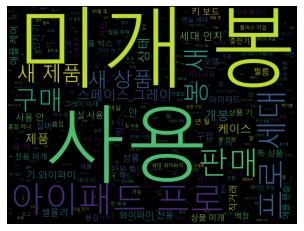

In [65]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgunsl.ttf', width=800, height=600, max_words=400).generate(' '.join(df['tokenized_sentence']))

plt.imshow(wc)
plt.axis('off')
plt.show()

# 불용어 처리

In [66]:
stop_words = ['아이패드', '프로', '구매', '판매', '직거래', '프로', '세대', '애플', '펜슬', '케어', '플러스', '일', '월', '년', '키', '보드', '제품', '인치', '구입', '스페이스', '프로', '그레이', '와이파이', '전용', '셀룰러', '형', '교환', '팝니다', '이며', '고', '특가', '가입', '실버', '택배', '천원', '만원', ]

def stop_word(sentence):
    new_sentence = sentence
    for stop_word in stop_words:
        new_sentence = new_sentence.replace(stop_word, '')
    return new_sentence

In [67]:
df['after_sw'] = df['status_sentence'].apply(stop_word)

In [68]:
df['after_sw'] = df['after_sw'].str.replace(' +', ' ')

C:\Users\김철용\AppData\Local\Temp/ipykernel_16220/3825639749.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['after_sw'] = df['after_sw'].str.replace(' +', ' ')


In [69]:
for i in df['after_sw']:
    print(i + '\n')

 풀박승 거의 사용 안 함 액정 본체 전부 깨끗합니다

 주말에 시간씩 영상 시청 용도로 사용했습니다 없이 새것 같습니다

 거의 사용을 안 해서 상태가 매우 좋습니다

미개봉 새 상품입니다 기가 미개봉 상품입니다 미개봉 상품입니다 기가 미개봉 새 상품입니다 미개봉 상품입니다 미개봉 

 최초 실행 배터리 진단 결과 배터리 성능 흠집 찍힘

따라서 우발적으로 파손되었을 때 언제든 리퍼 보증을 통해 아래 금액을 지불하시면 새 받으실 수 있습니다

 후 사용빈도가 적어서 합니다 미사용 케이스같이 챙겨 드리요 액정에 강화 유리 필름 부착된 상태입니다 실 흠집도 없는 새 상품급 배터리 퍼 보증기간 연까지 남아 있습니다

 미개봉 안양 평촌 범계 

 코리아 정품 비닐 미개봉입니다

 모델 상태 급 배터리 효율입니다 액정에 강화유리 붙어있습니다

집에서만 사용했습니다 배터리 상태는 정도 되는 거 같아요

케이블도 사용 안한 풀박스 영수증 보관 중입니다

 후 케이스에서 벗겨본 기억이 거의 없습니다 그리 첫날부터 정이 질감 필름을 사용해서 실제 액정은 본 적이 없습니다 각인을 새겨 놓았습니다 디자인 작업과 러스트 작업을 하다 보니 항상 창의적인 마음가짐을 가지라는 의미에서 각인을 새겨놓습니다 모서리에 찍힌 자국이나 긁힌 자국 없습니다

거의 사용하지 않았 현재 전신 필름 붙여져 있으며 상태는 신도급입니다 케이스 역시 거의 사용하지 않았습니다

 후 전면에 액정필름 부착해놓았 케이스 항상 끼 사용했습니다

 리퍼 받은 새 상품입니다

두 달 정도 사용하 그 후로는 사용한 적 없 잔흠집 휘어짐 은 사용은 부터 했습니다 배터리 성능입니다

만 하 애케플 사용은 한 번도 안 했습니다

 테라 미개봉 신품 합니다

거의 새 배터리 사이클 구성품 풀박스 펜스 풀백 급 스마트 케이스 보호촉 상태 상태 급 보호필름 부착 지역 서울 구로지역 연락처 안심번호 연락 댓글 확인 못하니 꼭 문자 또는 전화로 연락 주세요

풀박스 구성이 후 거의 사용하지 않았습니다

어제 리퍼 받은 새 상품입니

In [70]:
end_df = pd.DataFrame(df[['after_sw', 'label']])
end_df.columns = ['desc', 'label']
end_df

,desc,label
0,풀박승 거의 사용 안 함 액정 본체 전부 깨끗합니다,1
1,주말에 시간씩 영상 시청 용도로 사용했습니다 없이 새것 같습니다,1
2,거의 사용을 안 해서 상태가 매우 좋습니다,1
5,미개봉 새 상품입니다 기가 미개봉 상품입니다 미개봉 상품입니다 기가 미개봉 새 상품...,0
7,최초 실행 배터리 진단 결과 배터리 성능 흠집 찍힘,1
...,...,...
572,사진 보시면 정말 미개봉인 거 확인 가능하십니다,0
573,새 스토어 픽업 미개봉 가격 원 문자 카톡 전화 주세요,0
574,미개봉 애 커플까지 와이프 주려 샀는데 안 한 데서,0
578,비싼 기기인 만큼 미개봉 그대로 로만 거래할 예정이 궁금하신 거는 언제든지 문자 주세요,0


In [72]:
end_df.to_csv('아이패드 프로 12.9 5세대_크롤링_전처리_ver3.0.csv')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

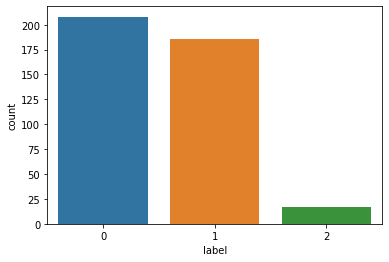

In [73]:
import matplotlib.pyplot as plt
import seaborn

seaborn.countplot(end_df['label'])